In [0]:
## 1. Read the dataset
#2. Drop the columns which are unique for all users like IDs (2.5 points)
#3. Distinguish the feature and target set (2.5 points)
#4. Divide the data set into training and test sets ( 2.5 points)
#5. Normalize the train and test data (5 points)
#6. Initialize & build the model (10 points)
#7. Predict the results using 0.5 as a threshold (5 points)
# Print the Accuracy score and confusion matrix (2.5 points)

In [4]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
     |████████████████████████████████| 3.8MB 49.0MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
# Add some necessary imports
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [6]:
from google.colab import files
uploaded= files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import io
bank_df=pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [30]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#2. Drop the columns which are unique for all users like IDs (2.5 points)

In [0]:
## Only Customer Id is unique for all user . Hence dropping it as asked.
bank_df.drop(columns=["CustomerId"], axis= 1, inplace=True) 

In [33]:
## Hence there are duplicate values in the surname column 
boolean = bank_df['Surname'].duplicated().any()
boolean

True

In [0]:
## Dropping other irrelevant columns
bank_df.drop(["RowNumber"], axis=1, inplace=True)

In [0]:
bank_df.drop(["Surname"], axis=1, inplace=True)

In [36]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
bank_df.isnull().sum() ## No null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
#3. Distinguish the feature and target set (2.5 points)

In [0]:
X= bank_df.iloc[:,:10]
Y= (bank_df.Exited)

In [48]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [49]:
#Apply Label Encoder 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
bank_df['Gender'] = le.fit_transform(bank_df['Gender'])
bank_df['Geography'] = le.fit_transform(bank_df['Geography'])

bank_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y)
X_train.shape


(8000, 10)

In [0]:
#5. Normalize the train and test data (2.5 points)
# normalising using standard scalar
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

#transform the x_train
X_train_std= scaler.transform(X_train)

X_test_std=scaler.transform(X_test)

Y_train_array= np.asarray(Y_train)

Y_test_array=np.asarray(Y_test)

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics


# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
#6. Initialize & build the model (7.5 points)
#Initialize Sequential Graph (model)

from tensorflow.keras.layers import BatchNormalization 

model = Sequential()
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(288,activation='relu'))
model.add(Dense(144,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs = 100
batch_size = 1000

In [55]:
history = model.fit(X_train_std, Y_train_array, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=True)
loss,accuracy  = model.evaluate(X_test_std, Y_test_array, verbose=False)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 163us/sample - loss: 0.5163 - accuracy: 0.7977 - val_loss: 0.5006 - val_accuracy: 0.7906
Epoch 2/100
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4841 - accuracy: 0.7977 - val_loss: 0.4843 - val_accuracy: 0.7906
Epoch 3/100
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4680 - accuracy: 0.7978 - val_loss: 0.4742 - val_accuracy: 0.7906
Epoch 4/100
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4578 - accuracy: 0.8006 - val_loss: 0.4658 - val_accuracy: 0.7906
Epoch 5/100
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4492 - accuracy: 0.8011 - val_loss: 0.4603 - val_accuracy: 0.7906
Epoch 6/100
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4414 - accuracy: 0.8039 - val_loss: 0.4539 - val_accuracy: 0.7919
Epoch 7/100
6400/6400 [==============================] - 0s 15u

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  132       
_________________________________________________________________
batch_normalization (BatchNo multiple                  48        
_________________________________________________________________
dense_1 (Dense)              multiple                  3744      
_________________________________________________________________
dense_2 (Dense)              multiple                  41616     
_________________________________________________________________
dense_3 (Dense)              multiple                  145       
Total params: 45,685
Trainable params: 45,661
Non-trainable params: 24
_________________________________________________________________


[0.790625, 0.790625, 0.790625, 0.790625, 0.790625, 0.791875, 0.793125, 0.795625, 0.799375, 0.8, 0.81, 0.81, 0.815, 0.82375, 0.82875, 0.833125, 0.8325, 0.838125, 0.8375, 0.8375, 0.84, 0.84125, 0.8425, 0.841875, 0.84, 0.8425, 0.843125, 0.845625, 0.843125, 0.845625, 0.841875, 0.839375, 0.845, 0.846875, 0.8475, 0.845625, 0.84875, 0.845, 0.844375, 0.844375, 0.843125, 0.84625, 0.846875, 0.8475, 0.84625, 0.848125, 0.846875, 0.85125, 0.848125, 0.85, 0.85, 0.848125, 0.84875, 0.84625, 0.845625, 0.853125, 0.844375, 0.845625, 0.84875, 0.846875, 0.849375, 0.8475, 0.843125, 0.85, 0.845625, 0.844375, 0.844375, 0.850625, 0.8425, 0.846875, 0.84625, 0.848125, 0.84125, 0.846875, 0.848125, 0.8475, 0.840625, 0.84625, 0.844375, 0.844375, 0.84625, 0.843125, 0.84875, 0.843125, 0.841875, 0.8475, 0.844375, 0.8475, 0.84625, 0.84375, 0.84875, 0.8475, 0.845, 0.846875, 0.845, 0.841875, 0.845, 0.841875, 0.84875, 0.844375]
[0.79765624, 0.79765624, 0.7978125, 0.800625, 0.80109376, 0.80390626, 0.8098438, 0.8134375, 0.8

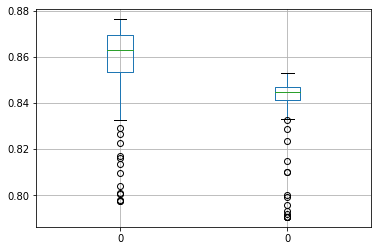

In [57]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [58]:
# Check for train and test accuracy
loss, acc = model.evaluate(X_test_std, Y_test_array, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train_std, Y_train_array, verbose=0)
print('Train Accuracy: %.3f' % acc)

Test Accuracy: 0.860
Train Accuracy: 0.868


In [72]:
from sklearn import metrics
Y_pred = np.round(model.predict(X_test_std))
Y_pred_thresh = model.predict_proba(X_test_std) >= 0.5
print('Confusion matrix without the threshold')
print(pd.DataFrame(metrics.confusion_matrix(Y_test_array, Y_pred, labels=[0 ,1]), index=['actual:Retain', 'actual:Exited'], columns=['predicted:Retain', 'predicted:Exited']))
print("---------------------------------------------------")

print('Confusion matrix using >=0.5 as threshold')
print(pd.DataFrame(metrics.confusion_matrix(Y_test_array, Y_pred_thresh, labels=[0 ,1]), index=['actual:Retain', 'actual:Exited'], columns=['predicted:Retain', 'predicted:Exited']))

Confusion matrix without the threshold
               predicted:Retain  predicted:Exited
actual:Retain              1518                75
actual:Exited               204               203
---------------------------------------------------
Confusion matrix using >=0.5 as threshold
               predicted:Retain  predicted:Exited
actual:Retain              1518                75
actual:Exited               204               203


In [76]:
print(metrics.classification_report(Y_test_array, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.73      0.50      0.59       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [0]:
## Inference :-
# There is no change in the accuracy or recall between the threshold values and one without threshold. Different combination of hyper parametrs were 
# tried to finally reach to the above accuracy .  The accuracy for this model is 86% approximately.
# Moreover the recall and precision is also not good for customers who exited. Precision and recall is good for customers who still continue to be
# associated with the bank.